**Phase 3 : Unsupervised learning**  
----

In this phase we choose k-means clustering as an unsupervised learning algorithm.k-means clustering is one of the simplest and popular unsupervised machine learning algorithms.It performs the division of objects into clusters that share similarities and are dissimilar to the objects belonging to another cluster.Unlike the supervised learning, there is no labeled data for this clustering.(1)

(1)“K-Means Clustering Algorithm,” Simplilearn.com. https://www.simplilearn.com/tutorials/machine-learning-tutorial/k-means-clustering-algorithm 

_______________________________________________________________________________________________________________________
**Evaluation methods**
----

We will start by defining Our evaluation methods that we will use on this phase for the k means clustering. we will use Silhouette coefficient, BCubed precision and recall and Total within-cluster sum of square. After Implementing every K value we will evaluate it with the those three evaluation methods.

**1. Silhouette coefficient**

We will start first with Silhouette Coefficient evaluation method. The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b).

**2. BCubed precision and recall**

The second Evaluation method that we will use is The BCubed precision and recall. The overall BCubed precision is the averaged precision of all items in the distribution. The BCubed recall is analogous, replacing “cluster” with “category”.

**3. Total within-cluster sum of square**

For the third evaluation method we will use is total within-cluster sum of square. The within-cluster sum of squares is a measure of the variability of the observations within each cluster. In general, a cluster that has a small sum of squares is more compact than a cluster that has a large sum of squares. The WSS measures the total variability of the data that is not explained by the clustering, and it is calculated as the sum of the squared distances between each sample and its cluster centroid.

So we start with importing the needed libraries 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings 
warnings.filterwarnings('ignore')

And then we will import the dataset, and then explore it. 

In [3]:
dataset = pd.read_csv('pre_advertisment(after2).csv') 
dataset

,Unnamed: 0.1,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Internet usage bucket
0,0,0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,3/27/2016 0:53,0,1
1,1,1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0,0
2,2,2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/2016 20:35,0,1
3,3,3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,1/10/2016 2:31,0,1
4,4,4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,6/3/2016 3:36,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2/11/2016 21:49,1,0
996,996,996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,4/22/2016 2:07,1,-1
997,997,997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2/1/2016 17:24,1,-1
998,998,998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,3/24/2016 2:35,0,0


In the Elbow method, we are actually varying the number of clusters (K) from 1 – 10. For each value of K, we are calculating WCSS (Within-Cluster Sum of Square). WCSS is the sum of the squared distance between each point and the centroid in a cluster. When we plot the WCSS with the K value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decrease. WCSS value is largest when K = 1. (2)

(2)B. Saji, “K Means Clustering | K Means Clustering Algorithm in Machine Learning,” Analytics Vidhya, Jan. 20, 2021. https://www.analyticsvidhya.com/blog/2021/01/in-depth-intuition-of-k-means-clustering-algorithm-in-machine-learning/

First we will select the feature vector of our dataset

In [6]:
feature_cols =['Daily Time Spent on Site','Age','Area Income','Internet usage bucket','Male','Daily Internet Usage'] 
features=dataset[feature_cols]

After that we will plot the diagram to choose the best k for out dataset 

Note: you may need to restart the kernel to use updated packages.


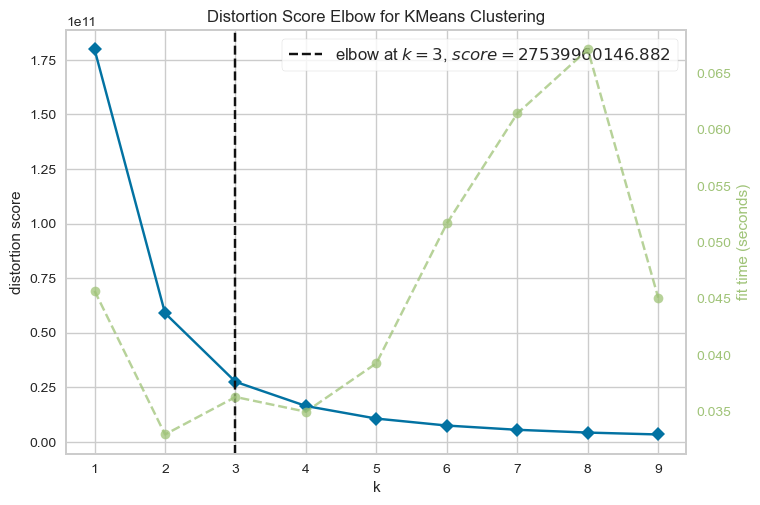

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [7]:
%pip install yellowbrick  

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

clustering_kmeans = KMeans(n_clusters=2);
features['clusters'] = clustering_kmeans.fit_predict(features)

X = features
y = features['clusters']

# Instantiate the clustering model and visualizer
km = KMeans(random_state=1)
visualizer = KElbowVisualizer(km, k=(1,10))

# Fit the data to the visualizer and then show the plot 
visualizer.fit(X)        
visualizer.show()


When we analyze the graph, we can see that the graph will rapidly change at a point and thus creating an elbow shape. From this point, the graph moves almost parallel to the X-axis. The K value corresponding to this point is the optimal value of K or an optimal number of clusters.

As we see in the above diagram, based on the elbow method the best value of k is 3 and we will take one from the left which is 2 and one from the right which is 3 to see how the clusters will differ. the we have k=2,k=3,k=4.

**1. K=2**
________

first step is to fit the data in 2 clusters 

In [8]:
clustering_kmeans = KMeans(n_clusters=2);
features['clusters'] = clustering_kmeans.fit_predict(features)

then we have applied a principal component analysis because we have more then 2 variables and it helps us with visulizing the cluster

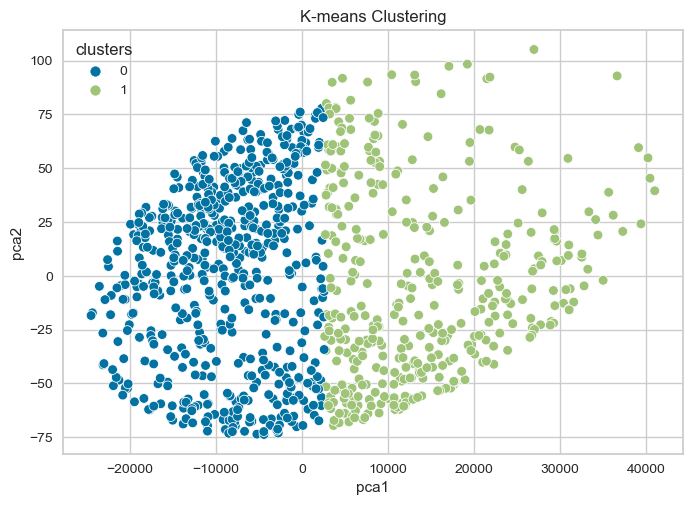

In [197]:
pca_num_components = 2 
reduced_data = PCA(n_components=pca_num_components).fit_transform(features)
results = pd.DataFrame(reduced_data, columns = ['pca1', 'pca2'])
sns.scatterplot(x="pca1",y="pca2", hue= features['clusters'], data=results )
plt.title('K-means Clustering')
plt.show()

After applying the clustering with k=2 the result is shown above we have 2 groups with below information approaximetly.  
blue group(0): -20500<=pc1<=2500                                                                                       
green group(1): 2500<=pc1<=40100                                                                                          
and we can see also that two groups are close to each others.

______
**K=2 Evaluation**

We will start evalutaing when the K value is equal to 2 with our evaluation methods.

In [9]:
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

Here we calculated the silhouette score for k=2 to compare between it and the other k values which one is the best.

In [139]:
silhouette_scores = dict()
range_of_k = range(2,3)
for k in range_of_k :
    untrained_model = KMeans(n_clusters=k)
    trained_model=untrained_model.fit(reduced_data)
    cluster_labels = trained_model.labels_
    score=silhouette_score(reduced_data, cluster_labels)
    S_2=score
    
print("K=2 Silhouette scores is : ",score)

K=2 Silhouette scores is :  0.5840638481631386


Then we will calculate the accuracy of K=2 and check how many of the samples were correctly labeled.

In [184]:
labels = clustering_kmeans.labels_
y= dataset['Clicked on Ad'].astype(object)
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 284 out of 1000 samples were correctly labeled.


In [185]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.28


from Accuracies score we can see that K=2 has actually the highest accuracy score with accuracy score equals to 0.28.

The second evaluation method BCubed precision and recall is calculated down below:

In [198]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import precision_score
import numpy as np

In [199]:
feature_cols =['Daily Time Spent on Site','Age','Area Income','Internet usage bucket','Male','Daily Internet Usage'] 


In [200]:
features = list(feature_cols)[:-2]
data = dataset[features]

clustering_kmeans = KMeans(n_clusters=2)
data['clusters'] = clustering_kmeans.fit_predict(data)

X = data
y = data['clusters']

kmeans = KMeans(n_clusters=2, random_state=98)
kmeans.fit(X)

y_pred = kmeans.labels_

precision = precision_score(y, y_pred, average='micro')
print('BCubed precision for K=2 is :', precision)

BCubed precision for K=2 is : 0.001


In [201]:
kmeans = KMeans(n_clusters=2, random_state=98)
kmeans.fit(X)

y_pred = kmeans.labels_

labels = np.unique(y)
recall = 0
for label in labels:
    idx = np.where(y == label)[0]
    recall += np.sum(y[idx] == y_pred[idx]) / len(idx)
recall /= len(labels)
print('BCubed recall for K=2 is :', recall)

BCubed recall for K=2 is : 0.0013020833333333333


In [142]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.datasets import load_iris

In [143]:
feature_cols =['Daily Time Spent on Site','Age','Area Income','Internet usage bucket','Male','Daily Internet Usage'] 


Here we calculated the total within-cluster sum of squares for the K value equal to 2 to compare between it and the other k values and see what is actually the best K value.

In [144]:
features = list(feature_cols)[:-2]
data = dataset[features]

clustering_kmeans = KMeans(n_clusters=2)
data['clusters'] = clustering_kmeans.fit_predict(data)

X = data
y = data['clusters']

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_
distances = np.sum((X - centroids[labels])**2, axis=1)
total_within_cluster_sum_of_squares = np.sum(distances)
print("Total within cluster sum of squares for K=2 is : ",total_within_cluster_sum_of_squares)

Total within cluster sum of squares for K=2 is :  58969821945.636635


**2. K=3**
________

we will repeat the code again but we will fit the data in 3 clusters.

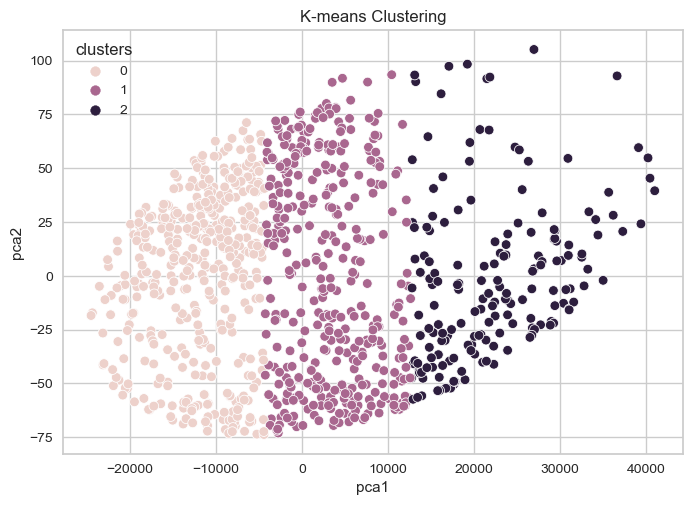

In [10]:
clustering_kmeans = KMeans(n_clusters=3);# changing the number of clusters
features['clusters'] = clustering_kmeans.fit_predict(features)

pca_num_components = 2 
reduced_data = PCA(n_components=pca_num_components).fit_transform(features)
results = pd.DataFrame(reduced_data, columns = ['pca1', 'pca2'])
sns.scatterplot(x="pca1",y="pca2", hue= features['clusters'], data=results )
plt.title('K-means Clustering')
plt.show()

After applying the clustering with k=3 the result is shown above we have 3 groups with below information approaximetly.  
black group(2): -20500<=pc1<=-5000                                                                                         
pink group(1): -5000<=pc1<=10250                                                                                        
Beige group(0): 10250<=pc1<=40100                                                                                       


______
**K=3 Evaluation**

We will start evalutaing when the K value is equal to 3 with our evaluation methods.

Here we calculated the silhouette score for k=3 to compare between it and the other k values which one is the best.

In [140]:
silhouette_scores = dict()
range_of_k = range(3,4)
for k in range_of_k :
    untrained_model = KMeans(n_clusters=k)
    trained_model=untrained_model.fit(reduced_data)
    cluster_labels = trained_model.labels_
    score=silhouette_score(reduced_data, cluster_labels)
    s_4=score
print("K=3 Silhouette scores is : ",score)

K=3 Silhouette scores is :  0.5624141238201399


Then we will calculate the accuracy of K=3 and check how many of the samples were correctly labeled.

In [187]:
labels = clustering_kmeans.labels_
y= dataset['Clicked on Ad'].astype(object)
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 140 out of 1000 samples were correctly labeled.


In [188]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.14


The second evaluation method BCubed precision and recall is calculated down below:

In [168]:
features = list(feature_cols)[:-2]
data = dataset[features]

clustering_kmeans = KMeans(n_clusters=2)
data['clusters'] = clustering_kmeans.fit_predict(data)

X = data
y = data['clusters']

kmeans = KMeans(n_clusters = 3, random_state=98)
kmeans.fit(X)

y_pred = kmeans.labels_

precision = precision_score(y, y_pred, average='micro')
print('BCubed precision for K=3 is :', precision)

BCubed precision for K=3 is : 0.355


In [169]:
kmeans = KMeans(n_clusters=3, random_state=98)
kmeans.fit(X)

y_pred = kmeans.labels_

labels = np.unique(y)
recall = 0
for label in labels:
    idx = np.where(y == label)[0]
    recall += np.sum(y[idx] == y_pred[idx]) / len(idx)
recall /= len(labels)
print('BCubed recall for K=3 is :', recall)

BCubed recall for K=3 is : 0.37531684940607923


Here we calculated the total within-cluster sum of squares for the K value equal to 3 to compare between it and the other k values and see what is actually the best K value.

In [145]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_
distances = np.sum((X - centroids[labels])**2, axis=1)
total_within_cluster_sum_of_squares = np.sum(distances)
print("Total within cluster sum of squares for K=3 is : ",total_within_cluster_sum_of_squares)

Total within cluster sum of squares for K=3 is :  27538250186.4144


**3. K=4**
________

Again we will repeat the code with fitting the data in 4 clusters

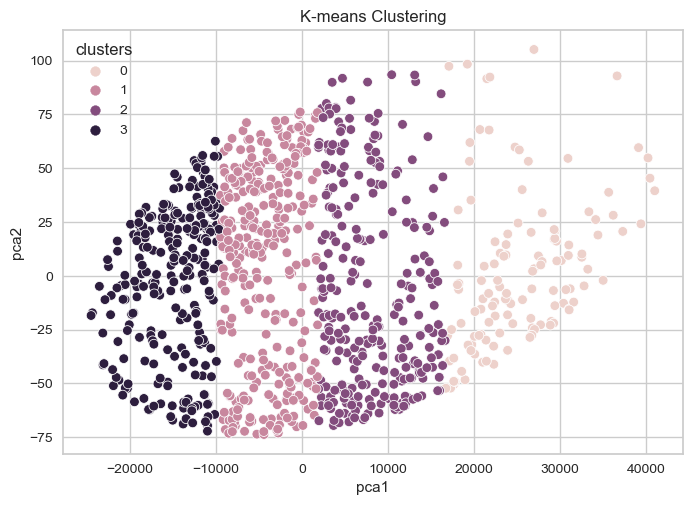

In [11]:
clustering_kmeans = KMeans(n_clusters=4);# changing the number of clusters
features['clusters'] = clustering_kmeans.fit_predict(features)

pca_num_components = 2 
reduced_data = PCA(n_components=pca_num_components).fit_transform(features)
results = pd.DataFrame(reduced_data, columns = ['pca1', 'pca2'])
sns.scatterplot(x="pca1",y="pca2", hue= features['clusters'], data=results )
plt.title('K-means Clustering')
plt.show()

After applying the clustering with k=4 the result is shown above we have 4 groups with below information approaximetly.  
black group(3): 10700<=pc1<=40100   
purple group(2): -1000<=pc1<=1500   
pink group(1): 1500<=pc1<=20600                                                                                        
Beige group(0): -20600<=pc1<=-10000

We can see that there is no big difference in the plots of clustering, the reason may be related to the dataset that we used the data is overlapped in every k.

______
**K=4 Evaluation**

We will start evalutaing when the K value is equal to 4 with our evaluation methods.

Here we calculated the silhouette score for k=4 to compare between it and the other k values which one is the best.

In [141]:
silhouette_scores = dict()
range_of_k = range(4,5)
for k in range_of_k :
    untrained_model = KMeans(n_clusters=k)
    trained_model=untrained_model.fit(reduced_data)
    cluster_labels = trained_model.labels_
    score=silhouette_score(reduced_data, cluster_labels)
    S_5=score
print("K=4 Silhouette scores is : ",score)

K=4 Silhouette scores is :  0.5387693592672108


Then we will calculate the accuracy of K=4 and check how many of the samples were correctly labeled.

In [190]:
labels = clustering_kmeans.labels_
y= dataset['Clicked on Ad'].astype(object)
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 123 out of 1000 samples were correctly labeled.


In [191]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.12


The second evaluation method BCubed precision and recall is calculated down below:

In [170]:
features = list(feature_cols)[:-2]
data = dataset[features]

clustering_kmeans = KMeans(n_clusters=4)
data['clusters'] = clustering_kmeans.fit_predict(data)

X = data
y = data['clusters']

kmeans = KMeans(n_clusters = 4, random_state=98)
kmeans.fit(X)

y_pred = kmeans.labels_

precision = precision_score(y, y_pred, average='micro')
print('BCubed precision for K=4 is :', precision)

BCubed precision for K=4 is : 0.003


In [171]:
kmeans = KMeans(n_clusters=4, random_state=98)
kmeans.fit(X)

y_pred = kmeans.labels_

labels = np.unique(y)
recall = 0
for label in labels:
    idx = np.where(y == label)[0]
    recall += np.sum(y[idx] == y_pred[idx]) / len(idx)
recall /= len(labels)
print('BCubed recall for K=4 is :', recall)

BCubed recall for K=4 is : 0.0023148148148148147


Here we calculated the total within-cluster sum of squares for the K value equal to 3 to compare between it and the other k values and see what is actually the best K value.

In [146]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_
distances = np.sum((X - centroids[labels])**2, axis=1)
total_within_cluster_sum_of_squares = np.sum(distances)
print("Total within cluster sum of squares for K=4 is : ",total_within_cluster_sum_of_squares)

Total within cluster sum of squares for K=4 is :  16453453728.48992


________
Comparison 
----------

We will start comparing the results of the three k values from all the evaluation methods applied above.

**1. Silhouette coefficient**

For the silhouette score we implemented the SilhouetteVisualizer to graph the results as shown in the figure down below where we can see that K=2 has the best result and the closest to +1.
https://dzone.com/articles/kmeans-silhouette-score-explained-with-python-exam

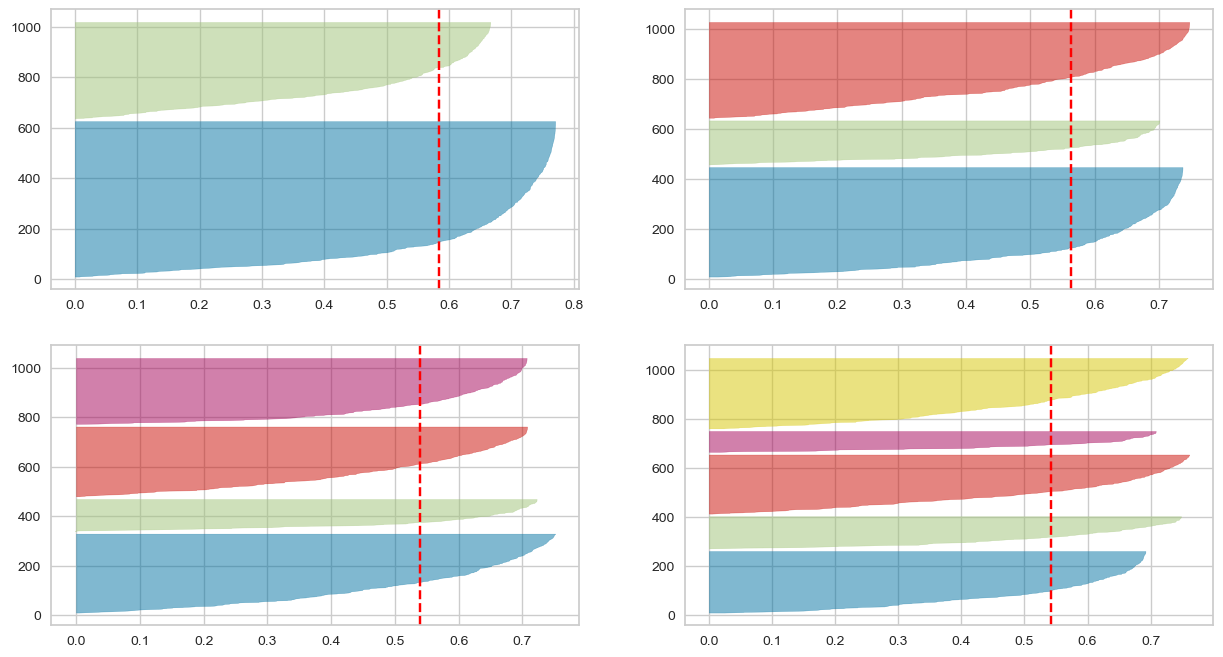

In [12]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

So we can see that the silhouette score for our k values are as follows: 
For K=2 Silhouette scores is :  0.5840638481631386
For K=3 Silhouette scores is :  0.5624141238201399
For K=4 Silhouette scores is :  0.5387693592672108

after observing those results we can see that the highest Silhouette score is 0.5840638481631386 for K=2 as shown in the figure down below :-

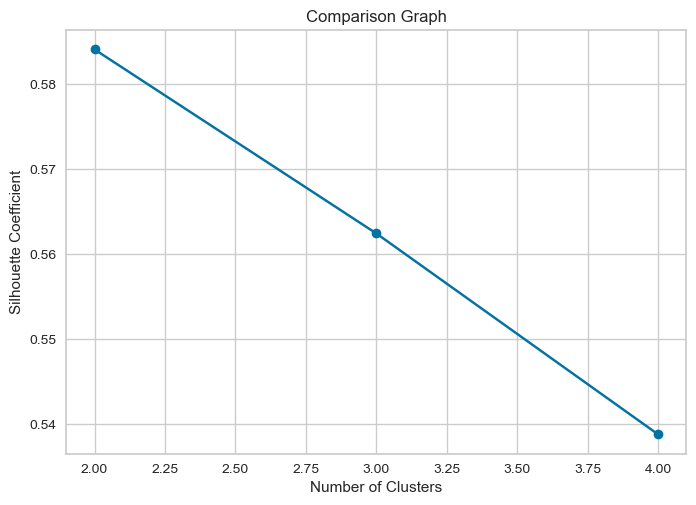

In [155]:
#Creating an array with the values of K.
k_values = [2,3,4]

#Creating an array with the values of the silhouette coefficient for each value of K respectively.
sc_values = [S_2, s_4, S_5]

#Plotting the graph.
plt.title("Comparison Graph")
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)
plt.plot(k_values,sc_values, 'o-')

even though our previous chosen k value as the best was 3 but the silhouette score doesn’t agree wuth that it shows that K=2 is the best as it has the highest silhouette score. But the values of the silhouette score for all the k values are actually very close to each other.

**2. BCubed precision and recall**

________
For the comparsion of BCubed precision and recall values

For the Precision and recall values for our three k values we can see that K=2 has the lowest values in term of precision and recall and K=3 has the highest values where K=3 precision equals 0.35 and recall equals 0.37 which is the highest and that actually support our decision from the Elbow method where we chose K=3 as the best k value.

**3. Total within-cluster sum of square**

After calculating the total within-cluster sum of square we can see that the results for all our k values are very large, and the smallest value among them are K=4 with a total within-cluster sum of square equal to 16453453728.48992 which is very small compared to the total within-cluster sum of square of K=2 and K=3 and the smaller the total within-cluster sum of square is the better it is so we can see here that K=4 here is the smallest which is the best.